10.	Classification using Deep neural network
Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset


In [1]:
# Import necessary libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load IMDB dataset with the top 10,000 most frequent words
vocab_size = 10000
maxlen = 200  # truncate or pad reviews to this length
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


In [3]:
# Preprocess: Pad sequences to make all reviews the same length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


In [4]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 433ms/step - accuracy: 0.6857 - loss: 0.5772 - val_accuracy: 0.8708 - val_loss: 0.3060
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 433ms/step - accuracy: 0.9041 - loss: 0.2501 - val_accuracy: 0.8674 - val_loss: 0.3126
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 436ms/step - accuracy: 0.9334 - loss: 0.1830 - val_accuracy: 0.8650 - val_loss: 0.3606
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 434ms/step - accuracy: 0.9519 - loss: 0.1339 - val_accuracy: 0.8798 - val_loss: 0.3650
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 437ms/step - accuracy: 0.9646 - loss: 0.1046 - val_accuracy: 0.8640 - val_loss: 0.3683


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.8579 - loss: 0.3823

Test Accuracy: 0.8576


In [9]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12,5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

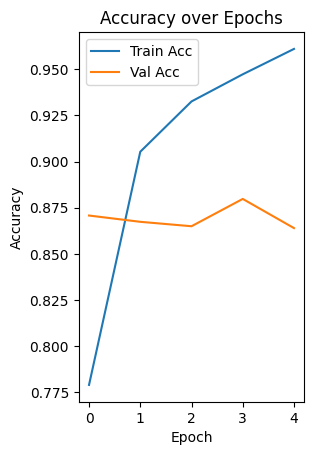

In [10]:
# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


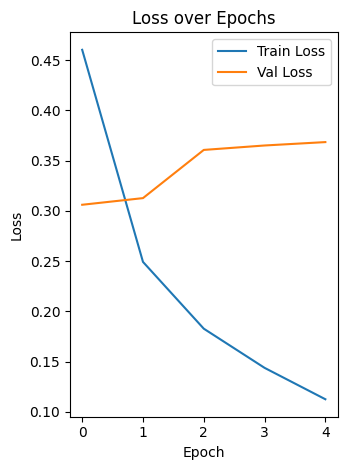

In [11]:
# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 324ms/step - accuracy: 0.6988 - loss: 0.5589 - val_accuracy: 0.8666 - val_loss: 0.3175
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 311ms/step - accuracy: 0.9020 - loss: 0.2581 - val_accuracy: 0.8632 - val_loss: 0.3451
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 314ms/step - accuracy: 0.9374 - loss: 0.1773 - val_accuracy: 0.8686 - val_loss: 0.3201
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 315ms/step - accuracy: 0.9525 - loss: 0.1377 - val_accuracy: 0.8748 - val_loss: 0.3370
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 320ms/step - accuracy: 0.9623 - loss: 0.1070 - val_accuracy: 0.8552 - val_loss: 0.5031
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8466 - loss: 0.5464

Test Accuracy: 0.8482


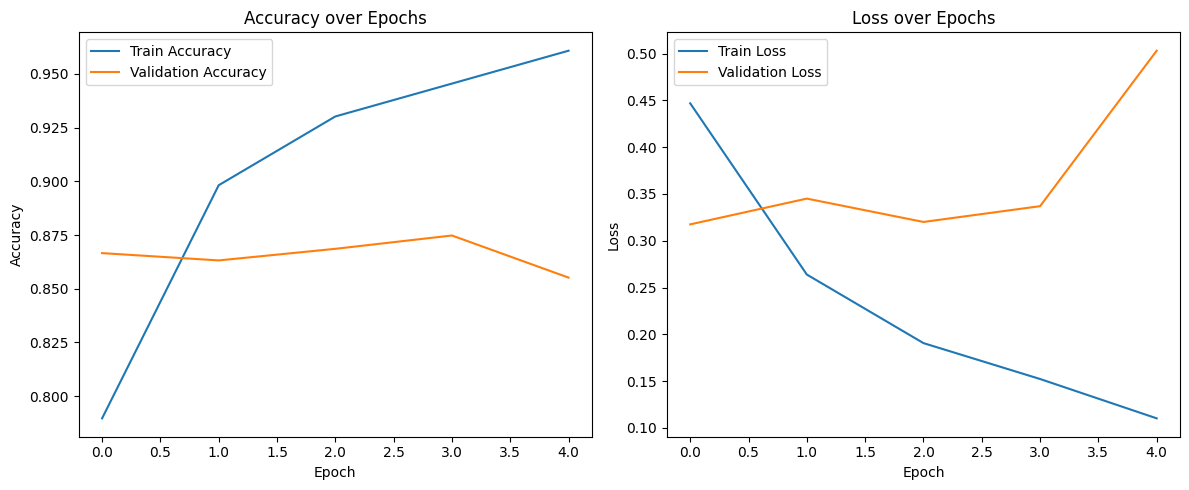

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


ValueError: Found array with dim 3. TSNE expected <= 2.

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 319ms/step - accuracy: 0.6582 - loss: 0.5861 - val_accuracy: 0.8540 - val_loss: 0.3472
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 311ms/step - accuracy: 0.8981 - loss: 0.2650 - val_accuracy: 0.8592 - val_loss: 0.3284
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step - accuracy: 0.9348 - loss: 0.1857 - val_accuracy: 0.8596 - val_loss: 0.3571
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step - accuracy: 0.9533 - loss: 0.1359 - val_accuracy: 0.8494 - val_loss: 0.3627
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 320ms/step - accuracy: 0.9658 - loss: 0.1054 - val_accuracy: 0.8702 - val_loss: 0.4085
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.8591 - loss: 0.4358

Test Accuracy: 0.8612


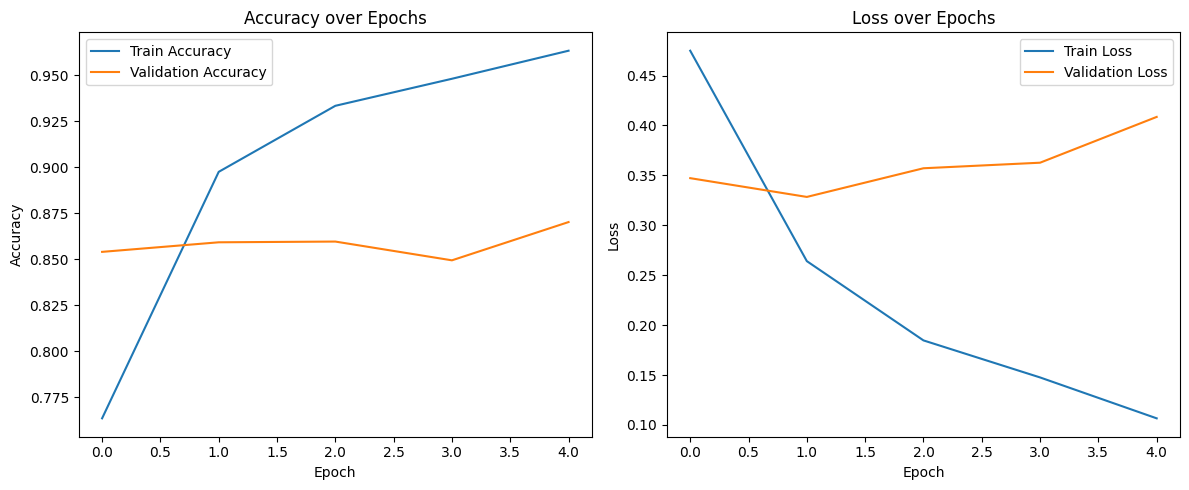

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step


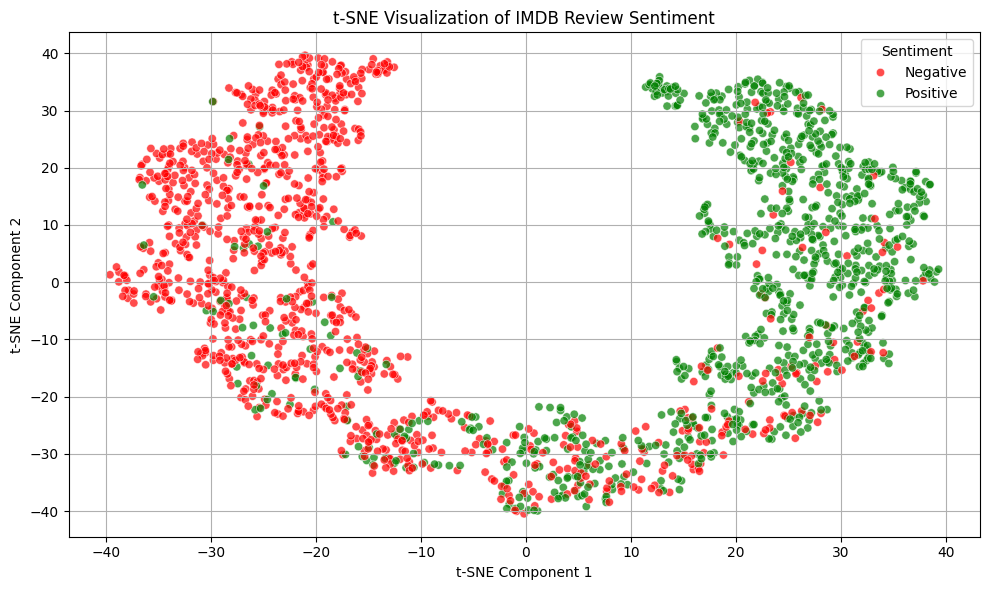

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dropout, Dense
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# ------------------- Load and preprocess IMDB dataset -------------------

vocab_size = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# ------------------- Define model using Functional API -------------------

inputs = Input(shape=(maxlen,))
x = Embedding(input_dim=vocab_size, output_dim=128)(inputs)
x = LSTM(units=64)(x)  # LSTM outputs shape: (batch_size, 64)
x = Dropout(0.5)(x)
outputs = Dense(units=1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# ------------------- Compile and train the model -------------------

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# ------------------- Evaluate model -------------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# ------------------- Plot accuracy and loss -------------------

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------- t-SNE 2D Visualization -------------------

# Extract features from LSTM layer (index 2)
feature_extractor = Model(inputs=model.input, outputs=model.get_layer(index=2).output)

# Sample subset for t-SNE (to save memory/time)
sample_size = 2000
X_sample = X_test[:sample_size]
y_sample = y_test[:sample_size]

# Extract LSTM features
lstm_features = feature_extractor.predict(X_sample)

# If output is 3D (batch_size, timesteps, features), average over timesteps
if lstm_features.ndim == 3:
    lstm_features = np.mean(lstm_features, axis=1)  # Shape becomes (batch_size, features)

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, perplexity=40, random_state=42, init='pca', learning_rate='auto')
features_2d = tsne.fit_transform(lstm_features)

# Map labels to text for better legend (optional)
label_map = {0: 'Negative', 1: 'Positive'}
labels = [label_map[label] for label in y_sample]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=labels, palette=['red', 'green'], alpha=0.7)
plt.title("t-SNE Visualization of IMDB Review Sentiment")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()
